In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from funciones_toolbox import *

In [2]:
np.random.seed(42)

n = 1000

df = pd.DataFrame({
    "coste": np.random.normal(3000, 1200, n),          # target continuo
    "edad": np.random.normal(18, 80, n),                 # numérica continua
    "IMC": np.random.randint(4, 27, n),                  # numérica discreta
    "fumador": np.random.choice(["Yes", "No"], n),            # binaria
    "provincia": np.random.choice(
        ["Lleida", "Barcelona", "Girona", "Tarragona"], n),                           # categórica
    "niños": np.random.normal(0, 4, n)                     # sin correlación
})

# Introducimos nulos
df.loc[np.random.choice(df.index, 10, replace=False), "edad"] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), "provincia"] = np.nan

df.head(40)

,coste,edad,IMC,fumador,provincia,niños
0,3596.056984,129.948435,9,Yes,Barcelona,4.894841
1,2834.082839,91.970695,14,Yes,Girona,-4.699365
2,3777.226246,22.770430,6,Yes,Girona,5.703579
3,4827.635828,-33.754942,11,Yes,Tarragona,-2.316181
4,2719.015950,73.857865,6,No,Lleida,-9.025000
5,2719.035652,49.478831,17,Yes,Girona,-4.713761
6,4895.055379,89.615458,16,Yes,Barcelona,0.872100
7,3920.921675,68.813744,16,Yes,Girona,-3.915257
8,2436.630737,101.964217,5,No,Tarragona,-0.352178
9,3651.072052,-24.818817,16,No,Lleida,1.353010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coste      1000 non-null   float64
 1   edad       990 non-null    float64
 2   IMC        1000 non-null   int32  
 3   fumador    1000 non-null   object 
 4   provincia  995 non-null    object 
 5   niños      1000 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 43.1+ KB


In [4]:
df_real = pd.read_csv("obligatoria_hard.csv", sep="|")

# Test describe_df(df) 20/01/26 20:40

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[X] Tiene docstring completo  
[ ] EL código está comentado  
[X] No rompe ante inputs incorrectos  
[ ] Devuelve ``None`` y imprime mensaje de error   

## Reglas particulares

### Inputs

[X] Recibe un DataFrame  
[ ] Falla correctamente si no es DataFrame

### Outputs

[X] Devuelve un DataFrame  
[X] Columnas = variables del df original

[X] Filas incluyen:
 - [X] Tipo de variable
 - [X] % de nulos
 - [X] Nº valores únicos
 - [X] % cardinalidad

### Validaciones

[X] El tipo detectado coincide con pandas
[X] El % de nulos es correcto
[X] La cardinalidad está bien calculada


In [5]:
print("TEST describe_df")
describe_df(df_real)

TEST describe_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,504,26,76,2,81,446,356,412,9,66,46,455,229
CARDIN (%),99.6,5.14,15.02,0.4,16.01,88.14,70.36,81.42,1.78,13.04,9.09,89.92,45.26


# Test tipifica_variables(df, umbral_categoria, umbral_continua)

## Reglas generales (todas las funciones)
[ ] Función existe y puede importarse  
[ ] El nombre coincide con el del enunciado  
[ ] Tiene docstring completo  
[ ] EL código está comentado  
[ ] No rompe ante inputs incorrectos  
[ ] Devuelve ``None`` y imprime mensaje de error    

## Reglas particulares

### Inputs

[ ] `df` DataFrame  
[ ] ``umbral_categoria`` (int)  
[ ] `umbral_continua` (float)  

### Outputs

[ ] Devuelve un DataFrame  
[ ] Columnas = "nombre_variable", "tipo_sugerido" 
[ ] Tantas filas como columnas del df  

### Lógica correcta

[ ] Cardinalidad = 2 -> **Binaria**  
[ ] Cardinalidad < umbral_categoria -> **Categórica**  
[ ] Cardinalidad >= umbral_categoria y % >= umbral_continua -> **Numérica continua**  
[ ] Else -> Numérica Discreta

### Validaciones

[ ] Funciona con columnas numéricas y categóricas  
[ ] Maneja valores nulos  
[ ] No rompe con umbrales raros



In [6]:
print("TEST tipifica_variables")
display(tipifica_variables(df_real, umbral_categoria=10, umbral_continua=0.5))

TEST tipifica_variables


,nombre_variable,tipo_sugerido
0,CRIM,Numerica Continua
1,ZN,Numerica Discreta
2,INDUS,Numerica Discreta
3,CHAS,Binaria
4,NOX,Numerica Discreta
5,RM,Numerica Continua
6,AGE,Numerica Continua
7,DIS,Numerica Continua
8,RAD,Categórica
9,TAX,Numerica Discreta


# Test get_features_num_regression(df, target_col, umbral_corr, pvalue=None)

## Reglas generales (todas las funciones)
[ ] Función existe y puede importarse  
[ ] El nombre coincide con el del enunciado  
[ ] Tiene docstring completo  
[ ] EL código está comentado  
[ ] No rompe ante inputs incorrectos  
[ ] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[ ] `df` DataFrame  
[ ] ``target_col``existe
[ ] ``target_col`` es num cont (target)  
[ ] `umbral_corr` (float, 0-1)  
[ ] ``pvalue`` = None

### Outputs

[ ] Lista strings  
[ ] Solo columnas numéricas  
[ ] No incluye target

### Lógica

[ ] Lista columnas num |correlación| > umbral_corr  
[ ] If pvalue $\neq$ None -> aplica test hipótesis  
[ ] Nivel significación correcto (1 - pvalue)

### Errores

[ ] Devuelve None si algo no cumple  
[ ] Imprimir mensaje 



In [7]:
print("TEST get_features_num_regression")
features_num = get_features_num_regression(
    df_real,
    target_col="MEDV",
    umbral_corr=0.2,
    pvalue=0.05
)

features_num

TEST get_features_num_regression


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

# Test plot_features_num_regression(df, target_col, columns, umbral_corr, pvalue=None)

## Reglas generales (todas las funciones)
[ ] Función existe y puede importarse  
[ ] El nombre coincide con el del enunciado  
[ ] Tiene docstring completo  
[ ] EL código está comentado  
[ ] No rompe ante inputs incorrectos  
[ ] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[ ] `df` DataFrame  
[ ] ``target_col`` es ""  
[ ] ``columns`` = []  
[ ] `umbral_corr` = 0  
[ ] ``pvalue`` = None

### Comportamiento

[ ] Si `columns` vacía -> usa numéricas  
[ ] Filtra si |correlación| > umbral_corr   
[ ] Aplica test si pvalue $\neq$ None  
[ ] Devuelve lista de columnas válidas

### Plots

[ ] Pairplots 
[ ] Target siempre aparece  
[ ] No rompe con muchas columnas  
[ ] (Extra) Divide en grupos de <= 5

### Errores

[ ] Devuelve None y printa error 
[ ] Maneja inputs incorrectos


In [8]:
# print("TEST plot_features_num_regression")

# features_plotted = plot_features_num_regression(
#     df_real,
#     target_col="MEDV",
#     umbral_corr=0.2,
#     pvalue=0.05
# )

# # features_plotted

# Test get_features_cat_regression(df, target_col, pvalue=0.05)

## Reglas generales (todas las funciones)
[ ] Función existe y puede importarse  
[ ] El nombre coincide con el del enunciado  
[ ] Tiene docstring completo  
[ ] EL código está comentado  
[ ] No rompe ante inputs incorrectos  
[ ] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[ ] `df` DataFrame  
[ ] ``target_col``existe
[ ] ``target_col`` es num cont o disc con alta cardinalidad (target)   
[ ] ``pvalue`` = 0.05

### Outputs

[ ] Lista columnas categóricas  

### Lógica

[ ] Elige test estadístico correcto  
[ ] Filtra por significación estadística   
[ ] No incluye variables numéricas  

### Errores

[ ] Devuelve None si algo no cumple  
[ ] Imprimir mensaje explicativo


In [9]:
print("TEST get_features_cat_regression")

features_cat = get_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=0.05
)

TEST get_features_cat_regression
Validacion de inputs terminada, podemos seguir...
Para la columna RAD, su rtdo es: Stat: 18.41604781216924p-value: 3.1256493316010175e-24 con un IC del 0.95

Nuestras features válidas son: ['RAD']


# Test plot_features_cat_regression(df, target_col, columns, pvalue = 0.05, with_individual_plot = False)

## Reglas generales (todas las funciones)
[X] Función existe y puede importarse  
[X] El nombre coincide con el del enunciado  
[ ] Tiene docstring completo  
[X] EL código está comentado  
[ ] No rompe ante inputs incorrectos  
[X] Devuelve ``None`` y imprime mensaje de error    

### Inputs

[X] `df` DataFrame  
[X] ``target_col`` es ""  
[X] ``columns`` = []   
[X] ``pvalue`` = 0.05
[X] ``with_individual_plot`` = False 

### Comportamiento

[X] Si `columns` vacía -> usa categóricas  
[ ] Filtra si por test estadístico |correlación| > umbral_corr   
[X] Devuelve lista de columnas válidas

### Plots

[ ] Histogramas agrupados por categoría   
[X] Gráficos legibles  
[ ] Opción ``with_individual_plot` funciona  
[ ] (Extra) Divide en grupos de <= 5  

### Errores

[ ] Error Dataframe   
[ ] Error target no existe  
[ ] Error target no numérico  
[ ] Error columna no existe  
[ ] Error p value numérico  
[ ] Error p value intervalo  
[ ] Error individual plot  


TEST plot_features_cat_regression (sense columnas)
OK, Dataframe y target.
pvalue es OK
Como al llamar la funcion no has introducido una lista de columns, se ha añadido las variables numericas que son: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']
Para la columna CRIM, tiene una correlacion del -0.38830460858681154 y un p-value del 1.1739870821943559e-19 en un IC del 0.95
Para la columna ZN, tiene una correlacion del 0.360445342450543 y un p-value del 5.713584153080858e-17 en un IC del 0.95
Para la columna INDUS, tiene una correlacion del -0.4837251600283729 y un p-value del 4.900259981752544e-31 en un IC del 0.95
Para la columna CHAS, tiene una correlacion del 0.1752601771902984 y un p-value del 7.390623170519879e-05 en un IC del 0.95
Para la columna NOX, tiene una correlacion del -0.4273207723732826 y un p-value del 7.065041586253423e-24 en un IC del 0.95
Para la columna RM, tiene una correlacion del 0.6953599470715395 y un p-val

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

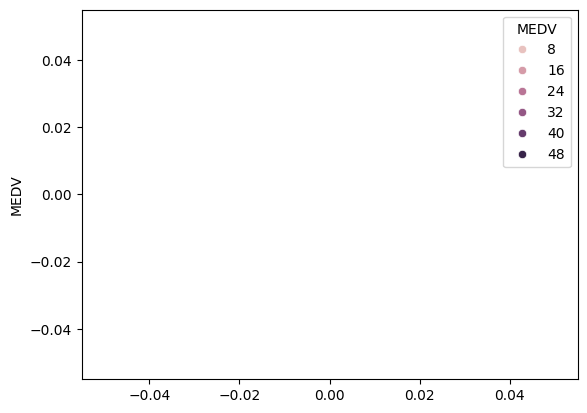

In [ ]:
print("TEST plot_features_cat_regression (sense columnas)")

features_cat_plot = plot_features_cat_regression(
    df_real,
    target_col="MEDV",
    pvalue=0.05,
    with_individual_plot=True
)

features_cat_plot

# Test integral

                  CRIM       ZN    INDUS     CHAS      NOX       RM      AGE  \
DATA_TYPE      float64  float64  float64  float64  float64  float64  float64   
MISSINGS (%)       0.0      0.0      0.0      0.0      0.0      0.0      0.0   
UNIQUE_VALUES      504       26       76        2       81      446      356   
CARDIN (%)        99.6     5.14    15.02      0.4    16.01    88.14    70.36   

                   DIS      RAD      TAX  PTRATIO    LSTAT     MEDV  
DATA_TYPE      float64  float64  float64  float64  float64  float64  
MISSINGS (%)       0.0      0.0      0.0      0.0      0.0      0.0  
UNIQUE_VALUES      412        9       66       46      455      229  
CARDIN (%)       81.42     1.78    13.04     9.09    89.92    45.26  
   nombre_variable      tipo_sugerido
0             CRIM  Numerica Continua
1               ZN  Numerica Discreta
2            INDUS  Numerica Discreta
3             CHAS            Binaria
4              NOX  Numerica Discreta
5               RM  N

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

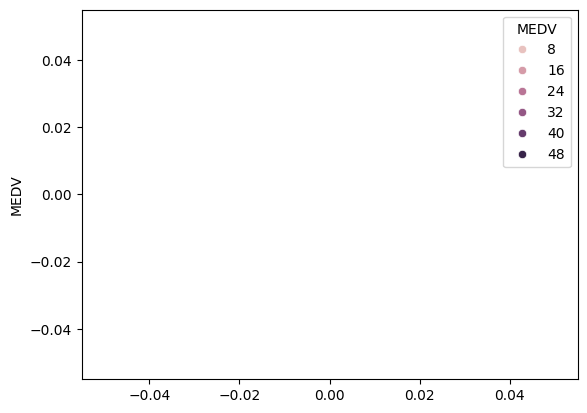

In [11]:
print(describe_df(df_real))

print(tipifica_variables(df_real, 10, 0.5))

print(f"Features numéricas")
num_feats = get_features_num_regression(df_real, "MEDV", 0.2)
print(f"Features categóricas")
cat_feats = get_features_cat_regression(df_real, "MEDV")

# print(f"Gráficos numéricas")
# plot_features_num_regression(df_real, "MEDV", num_feats)
print(f"Gráficos categóricas")
plot_features_cat_regression(df_real,target_col="MEDV",pvalue=0.05,with_individual_plot=False)